In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import norm
import matplotlib.lines as mlines
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from config import ORDER, JOURNAL_MAP

plt.rcParams["font.family"] = "Arial"
plt.rcParams['legend.title_fontsize'] = 7
plt.rcParams["text.usetex"] = True

df_sample = pd.read_csv("../data/focal_papers.csv")
df_generated = pd.read_csv("../data/generated_references.csv")
df_ground_truth = pd.read_csv("../data/ground_truth_references.csv")

# existing vs non-existent
df_existing = df_generated[df_generated["Exists"] == 1.0]
df_non_existent = df_generated[df_generated["Exists"] == 0.0]

/var/folders/kq/bwvwl1hd4g12lmk871x7q_br0000gn/T/ipykernel_33182/2153734850.py:18: DtypeWarning: Columns (4,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df_generated = pd.read_csv("../data/generated_references.csv")


In [2]:
# additional computations

# count occurences
others = ["Conference", 'Repository', 'BookChapter', 'Thesis', 'Dataset']

df_ground_truth.loc[:, 'DocType_new'] = df_ground_truth[
    'DocType'
].replace(others, 'Others')
df_existing.loc[:, 'DocType_new'] = df_existing[
    'DocType'
].replace(others, 'Others')

combined_counts = pd.concat([
    df_ground_truth.DocType_new.value_counts().rename('Count').reset_index().assign(Type='ground_truth'),
    df_existing.DocType_new.value_counts().rename('Count').reset_index().assign(Type='generated')
], ignore_index=True).rename(columns={'index': 'DocType_new'})

normalized_counts = (
    combined_counts
    .groupby('Type')
    .apply(lambda group: group.assign(Count=group['Count'] / group['Count'].sum() * 100))
    .reset_index(drop=True)
)

# citation boxenplots
combined_citations = pd.concat([
    df_ground_truth[df_ground_truth.DocType == "Journal"].Citation_Count_x.rename('Citations').reset_index().assign(Type='ground_truth_journal'),
    df_existing[df_existing.DocType == "Journal"].Citations.rename('Citations').reset_index().assign(Type='generated_journal'),
    df_ground_truth[df_ground_truth.DocType == "Book"].Citation_Count_x.rename('Citations').reset_index().assign(Type='ground_truth_book'),
    df_existing[df_existing.DocType == "Book"].Citations.rename('Citations').reset_index().assign(Type='generated_book'),
], ignore_index=True)

# indicators
df_ground_truth["Patent_indicator"] = np.where(df_ground_truth["Patent_Count"] != 0, 1, 0)
df_existing["Patent_indicator"] = np.where(df_existing["PatentCount"] != 0, 1, 0)

df_ground_truth["NCT_indicator"] = np.where(df_ground_truth["NCT_Count"] != 0, 1, 0)
df_existing["NCT_indicator"] = np.where(df_existing["NCTCount"] != 0, 1, 0)

df_ground_truth["Newsfeed_indicator"] = np.where(df_ground_truth["Newsfeed_Count"] != 0, 1, 0)
df_existing["Newsfeed_indicator"] = np.where(df_existing["NewsfeedCount"] != 0, 1, 0)

df_ground_truth["Tweet_indicator"] = np.where(df_ground_truth["Tweet_Count"] != 0, 1, 0)
df_existing["Tweet_indicator"] = np.where(df_existing["TweetCount"] != 0, 1, 0)

df_ground_truth["NIH_indicator"] = np.where(df_ground_truth["NIH_Count"] != 0, 1, 0)
df_existing["NIH_indicator"] = np.where(df_existing["NIHCount"] != 0, 1, 0)

df_ground_truth["NSF_indicator"] = np.where(df_ground_truth["NSF_Count"] != 0, 1, 0)
df_existing["NSF_indicator"] = np.where(df_existing["NSFCount"] != 0, 1, 0)

df_indicators = pd.concat(
    [
        pd.concat(
            [
                df_ground_truth[["Patent_indicator"]]
                .rename(columns={"Patent_indicator": "indicator"})
                .assign(Type="patent"),

                df_ground_truth[["NCT_indicator"]]
                .rename(columns={"NCT_indicator": "indicator"})
                .assign(Type="nct"),
                
                df_ground_truth[["Newsfeed_indicator"]]
                .rename(columns={"Newsfeed_indicator": "indicator"})
                .assign(Type="newsfeed"),

                df_ground_truth[["Tweet_indicator"]]
                .rename(columns={"Tweet_indicator": "indicator"})
                .assign(Type="tweet"),

                df_ground_truth[["NIH_indicator"]]
                .rename(columns={"NIH_indicator": "indicator"})
                .assign(Type="nih"),

                df_ground_truth[["NSF_indicator"]]
                .rename(columns={"NSF_indicator": "indicator"})
                .assign(Type="nsf"),
            ]
        ).assign(Category='ground_truth'),
        pd.concat(
            [
                df_existing[["Patent_indicator"]]
                .rename(columns={"Patent_indicator": "indicator"})
                .assign(Type="patent"),

                df_existing[["NCT_indicator"]]
                .rename(columns={"NCT_indicator": "indicator"})
                .assign(Type="nct"),

                df_existing[["Newsfeed_indicator"]]
                .rename(columns={"Newsfeed_indicator": "indicator"})
                .assign(Type="newsfeed"),

                df_existing[["Tweet_indicator"]]
                .rename(columns={"Tweet_indicator": "indicator"})
                .assign(Type="tweet"),

                df_existing[["NIH_indicator"]]
                .rename(columns={"NIH_indicator": "indicator"})
                .assign(Type="nih"),

                df_existing[["NSF_indicator"]]
                .rename(columns={"NSF_indicator": "indicator"})
                .assign(Type="nsf"),
            ]
        ).assign(Category='generated'),
    ]
)

/var/folders/kq/bwvwl1hd4g12lmk871x7q_br0000gn/T/ipykernel_33182/3654202631.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_existing.loc[:, 'DocType_new'] = df_existing[
/var/folders/kq/bwvwl1hd4g12lmk871x7q_br0000gn/T/ipykernel_33182/3654202631.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.assign(Count=group['Count'] / group['Count'].sum() * 100))
/var/folders/kq/bwvwl1hd4g12lmk871x7q_br0000gn/T/ipykernel_33182/3654

/Users/andresalgaba/Library/CloudStorage/Dropbox/Mac/github/LLMs_scientific_literature/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Text(-0.065, 1, '\\textbf{d}')

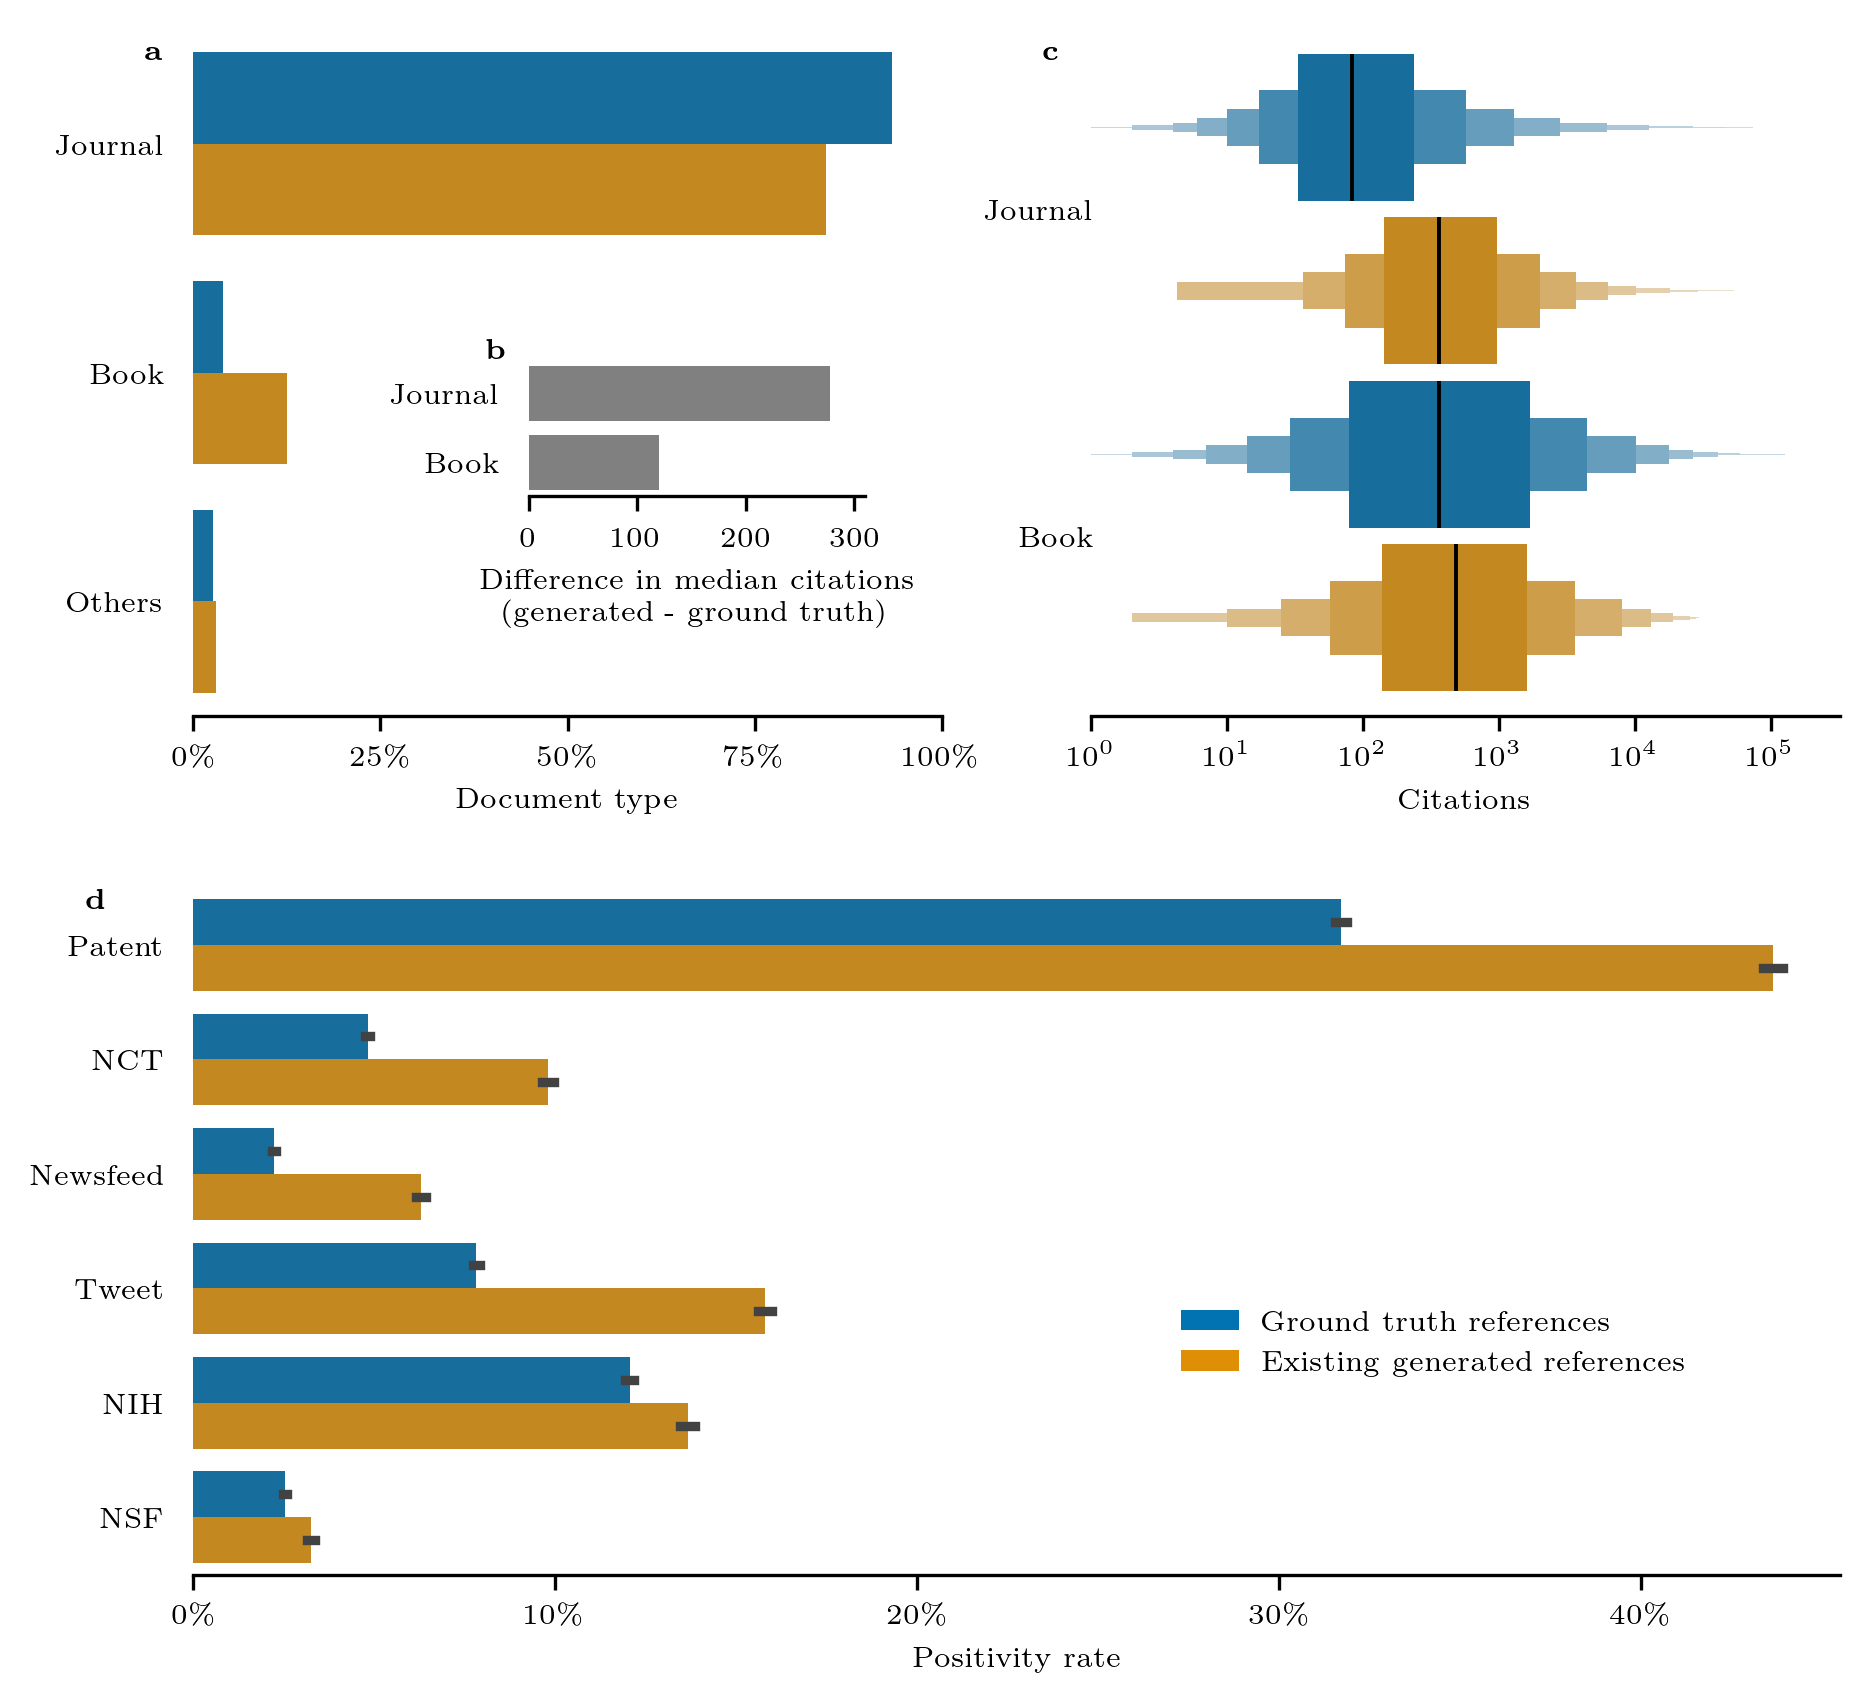

In [3]:
Figure1, ax1 = plt.subplot_mosaic(
    [
        ['A', 'B'],
        ['C', 'C'],
    ],
    figsize=(7.08, 6.69),
    dpi=300,
    gridspec_kw={'wspace': 0.2, 'hspace': 0.25},  # Adjust spacing
)

# A
sns.barplot(
    data=normalized_counts,
    x='Count',
    y='DocType_new',
    hue='Type',
    palette=["#de8f05", "#0173b2"],
    hue_order=['generated', 'ground_truth'],
    order=['Others', 'Book', 'Journal'],
    legend=False,
    ax=ax1['A'],
)

ax1["A"].set_title("")
ax1["A"].set_xlim(0, 100)
ax1["A"].set(ylim=(-0.5, 2.5))
ax1["A"].set_xlabel("Document type", fontsize=7)
ax1["A"].set_ylabel("", fontsize=7, rotation=0)
# ax1["A"].yaxis.set_label_coords(0., 1.04)
ax1["A"].set_xticks(
    ticks=[0, 25, 50, 75, 100],
    labels=[r"0$\%$",r"25$\%$",r"50$\%$",r"75$\%$",r"100$\%$"],
    fontsize=7,
)
ax1["A"].set_yticks(
    [0,1,2],
    labels=[r"Others", r"Book", r"Journal"],
    fontsize=7,
)

ax1["A"].tick_params(left=False)
sns.despine(ax=ax1["A"], left=True, bottom=False)

# difference inset plot
difference_ax = inset_axes(
    ax1["A"], width="45%", height="20%", loc='upper left',
    bbox_to_anchor=(0.42, -0.45, 1, 1), bbox_transform=ax1['A'].transAxes
)

sns.barplot(
    x=[
        df_existing[df_existing.DocType == "Journal"].Citations.median() - df_ground_truth[df_ground_truth.DocType == "Journal"].Citation_Count_x.median(),
        df_existing[df_existing.DocType == "Book"].Citations.median() - df_ground_truth[df_ground_truth.DocType == "Book"].Citation_Count_x.median()
    ],
    y=[0,1],
    color='#808080',
    orient='h',
    ax=difference_ax
)

difference_ax.set_title("")
difference_ax.set_xlim(0, 310)
# # ax1["B"].set(ylim=(-0.4, 0.4))
difference_ax.set_xlabel("Difference in median citations \n (generated - ground truth)", fontsize=7)
difference_ax.set_ylabel("", fontsize=7, rotation=0)
# # # ax1["A"].yaxis.set_label_coords(0., 1.04)
difference_ax.set_xticks(
    ticks=[0, 100, 200, 300],
    labels=[r"$0$", r"$100$", "$200$", "$300$"],
    fontsize=7
)
difference_ax.set_yticks(
    [0, 1],
    labels=[r"Journal", r"Book"],
    fontsize=7,
)
# ax1["B"].yaxis.set_tick_params(pad=-2)

difference_ax.tick_params(left=False)
sns.despine(ax=difference_ax, left=True, bottom=False)

# B
sns.boxenplot(
    data=combined_citations,
    x='Citations',
    hue='Type',
    log_scale=True,
    palette=["#0173b2", "#de8f05", "#0173b2", "#de8f05"],
    hue_order=['ground_truth_journal', 'generated_journal', 'ground_truth_book', 'generated_book'],
    gap=0.1,
    edgecolor=None,
    linecolor='black',
    showfliers=False,
    legend=False,
    ax=ax1['B'],
)

ax1["B"].set_title("")
ax1["B"].set_xlim(1, 320000)
ax1["B"].set(ylim=(0.42, -0.42))
ax1["B"].set_xlabel("Citations", fontsize=7)
ax1["B"].set_ylabel("", fontsize=7, rotation=0)
# # ax1["A"].yaxis.set_label_coords(0., 1.04)
ax1["B"].set_xticks(
    ticks=[1, 10, 100, 1000, 10000, 100000],
    labels=[r"$10^0$", r"$10^1$", "$10^2$", "$10^3$", "$10^4$", "$10^5$"],
    fontsize=7
)
ax1["B"].set_yticks(
    [0.2, -0.2],
    labels=[r"Book", r"Journal"],
    fontsize=7,
)
ax1["B"].yaxis.set_tick_params(pad=-4)

ax1["B"].tick_params(left=False)
sns.despine(ax=ax1["B"], left=True, bottom=False)

# C
sns.barplot(
    df_indicators,
    x="indicator",
    y="Type",
    hue="Category",
    palette=["#0173b2", "#de8f05"],
    estimator="mean",
    legend=False,
    ax=ax1["C"],
)

ax1["C"].tick_params(left=False)
ax1["C"].set_xlabel("Positivity rate", fontsize=7)
ax1["C"].set(xlim=(0, 0.455))
ax1["C"].set_ylabel("", fontsize=7)
ax1["C"].set_yticks(
    ticks=[5, 4, 3, 2, 1, 0],
)
ax1["C"].set_yticklabels(
    labels=["NSF", "NIH", "Tweet", "Newsfeed", "NCT", "Patent"],
    fontsize=7,
)
ax1["C"].set_xticks(
    [0,0.10,0.20,0.30,0.40],
    labels=[r"0$\%$",r"10$\%$",r"20$\%$",r"30$\%$",r"40$\%$"],
    fontsize=7,
)
ax1["C"].set_title("")
ax1["C"].grid(False)

sns.despine(ax=ax1["C"],left=True, bottom=False)

# legend
legend_elements = [
    Patch(facecolor='#0173b2', edgecolor=None, label='Ground truth references'),
    Patch(facecolor='#de8f05', edgecolor=None, label='Existing generated references'),
]

ax1["C"].legend(
    handles=legend_elements,
    loc='upper right',
    title='',
    title_fontsize=7,
    fontsize=7,
    frameon=False,
    bbox_transform=Figure1.transFigure,
    bbox_to_anchor=(0.84, 0.255),
)

# annotations
ax1["A"].text(-0.065, 0.985, r"\textbf{a}", transform=ax1["A"].transAxes, 
        fontsize=7, fontweight='bold', va='top', ha='left')
difference_ax.text(-0.125, 1.15, r"\textbf{b}", transform=difference_ax.transAxes,
        fontsize=7, fontweight='bold', va='top', ha='left')
ax1["B"].text(-0.065, 0.985, r"\textbf{c}", transform=ax1["B"].transAxes, 
        fontsize=7, fontweight='bold', va='top', ha='left')
ax1["C"].text(-0.065, 1, r"\textbf{d}", transform=ax1["C"].transAxes, 
        fontsize=7, fontweight='bold', va='top', ha='left')